## Problem Statement - I

 
### Introduction

1. Aims to give you an idea of applying EDA in a real business scenario. 
2. Applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services 
3. Understand how data is used to minimise the risk of losing money while lending to customers.
 
### Business Understanding

1. The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. 

IMPORTANT TO DO : IT MEANS THAT WE NEED TO Analyse the CREDIT HISTORY and make a decision to give loans and reduce the risk.

Reason Behind :

 Some consumers use it as their advantage by becoming a defaulter. 

2.   I am working for a consumer finance company which specialises in lending various types of loans to urban customers. 

3. I have to use EDA to analyse the patterns present in the data. 

Why AM I DOING ????........

4. This will ensure that the applicants are capable of repaying the loan are not rejected.
 
FLOW OF LOAN APPLICATION :

5. Company receives a 
    loan application ------ >>>>> 
    DECIDE ------>>>>>> loan approval based on the applicant’s profile. 


6. Two types of risks are associated with the bank’s decision:

 a. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
 b. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
 
7.  Data given below contains the information about the loan application at the time of applying for the loan. 
    It contains two types of scenarios:

    The client with payment difficulties: 
    He/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

    All other cases: All other cases when the payment is paid on time.
 
 
#### When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1. Approved: The Company has approved loan Application
2. Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
3. Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
4. Unused offer:  Loan has been cancelled by the client but on different stages of the process.

We need to use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
 
 
### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).
 
### Data Understanding

Download the dataset from below.
Datasetfile_download	Download
This dataset has 3 files as explained below: 
 
1. 'application_data.csv'  contains all the information of the client at the time of application. 
The data is about whether a client has payment difficulties.
 
2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
 
3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

### Problem Statement - II

 
## Results Expected by Learners

1. Present the overall approach of the analysis in a presentation.

2. Mention the problem statement and the analysis approach briefly.

3. Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

Hint: Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

4. Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

5. Identify if there is data imbalance in the data. Find the ratio of data imbalance.

Hint: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.
 
Hint: Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

6. Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

7. Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). 
    Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing. 
    
8. Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. 

9. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 
 
10. You need to submit one/two Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. The presentation file needs to be in PDF format and should contain the points discussed above with the necessary visualisations. Also, all the visualisations and plots must be done in Python(should be present in the Ipython notebook), though they may be recreated in Tableau for better aesthetics in the PPT file.

# Importing the libraries.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Importing Data

In [73]:
application_data = pd.read_csv("application_data.csv")
previous_application = pd.read_csv("previous_application.csv")

# Data Dimensions

In [74]:
print ("application_data     :",application_data.shape)
print ("previous_application :",previous_application.shape)

application_data     : (307511, 122)
previous_application : (1670214, 37)


# First Few rows of Data

In [4]:
# seeing top 5 rows of application_data
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# seeing top 5 rows of previous_application
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# shape of application data
application_data.shape

(307511, 122)

In [76]:
# shape of previous data
previous_application.shape

(1670214, 37)

# Comment:

previous_application contains 37 features and 1670214 rows
(Out of which 15 features are float64, 6 features are integer, 16 features are object datatype)

application_data contains 121 features, 1 target variable, and 307511 rows
(Out of which 65 features are float64, 41 features are integer, 16 features are object datatype)



# Data Cleaning : application_data

In [77]:
# checking the percentage of null values in each column
100*application_data.isnull().mean().sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

# Removing columns with missing values more than 40%
# key point
As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [78]:
# list of ccolmns with null values more or equal to 40%
col_40_null = application_data.columns[100*application_data.isnull().mean()>=40]
col_40_null

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [79]:
# let see how many columns is having missing values more than 40%
col_40_null.shape[0]

49

In [80]:
# droping the columns with more than 40% of missing values
application_data.drop(col_40_null,axis=1,inplace = True)

In [81]:
# shape of application data after droping columns
application_data.shape

(307511, 73)

# Observation
after droping columns with more than 40% null values there are 73 features remaining

# Converting negative values to absolute values

In [82]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_EMPLOYED'] = abs(application_data['DAYS_EMPLOYED'])
application_data['DAYS_REGISTRATION'] = abs(application_data['DAYS_REGISTRATION'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])

In [83]:
# lets see the head of the data 
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Checking Data Imbalance

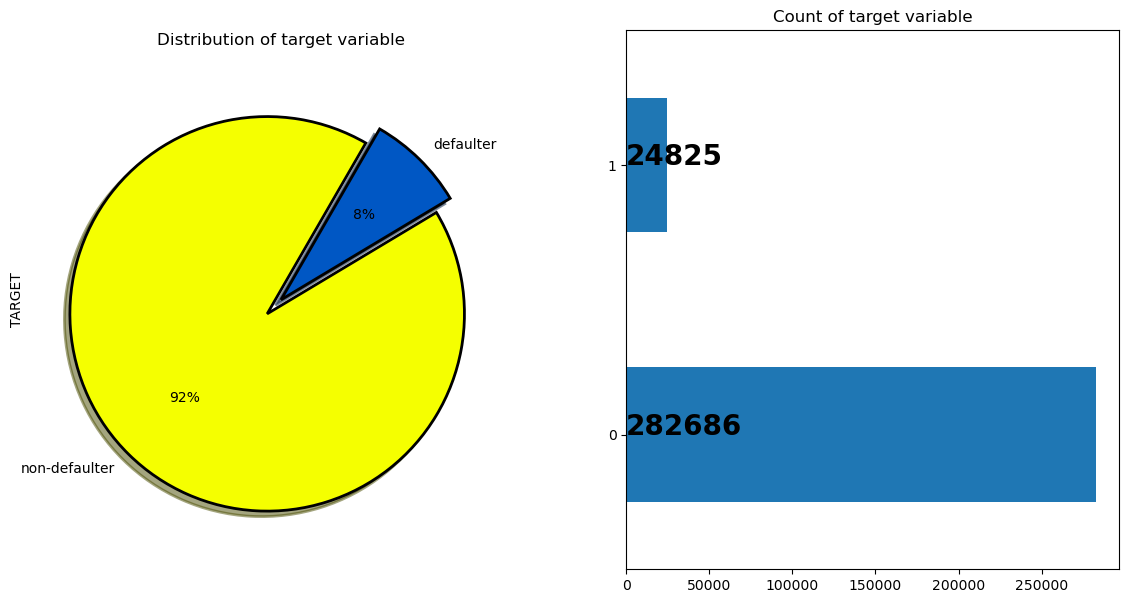

In [84]:
plt.figure(figsize=(14,7))
plt.subplot(121)
application_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["non-defaulter","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = application_data["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(application_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

# Comment: 
This data is highly imbalanced as number of defaulter is very less in total population. Data Imbalance Ratio

Defaulter : Non-Defaulter = 8 : 92 = 2 : 23

# feature selection

- now as target variable is a binary categorical variable so we can make a list of all the binary categorical variables in the application data and find the correlations between them
- if a feature is highly correlated to the target variable then we can check for any causation
- else we can drop it

In [85]:
# making the list of all flag variables
flag_variables = []

for var in application_data.columns:
    if var.startswith('FLAG_'):
        flag_variables.append(var)
flag_variables.append('TARGET')
        
len(flag_variables)

29

In [86]:
#lets create the sclice the data set with all flag features 
flag_df = application_data[flag_variables]
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
# lets covert yes and no's to 1 and 0's
flag_df['FLAG_OWN_CAR'] = flag_df['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
flag_df['FLAG_OWN_REALTY'] = flag_df['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
# shape of flag_df
flag_df.columns.shape

(29,)

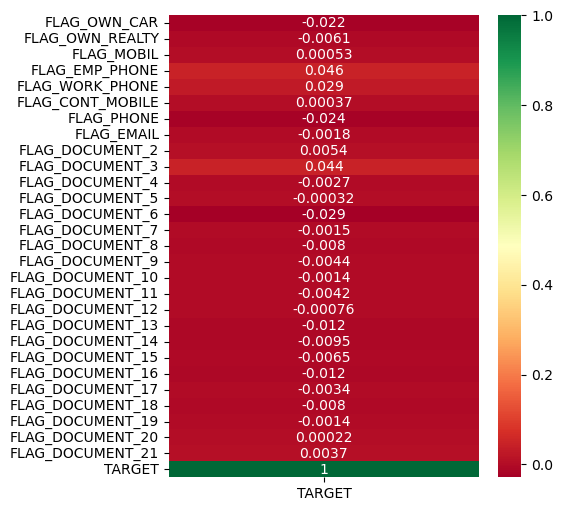

In [89]:
# ploting the correaltion with target varable
plt.figure(figsize=(5,6))
sns.heatmap(pd.DataFrame(flag_df.corr()['TARGET']),annot=True,cmap='RdYlGn')
plt.show()

# Comment:

from the above head map of correlation of target variable with respect to other flage variables we can conclude that

- there is no good correlation between the flag variables and the target columns

due to the above metioned reasons we are droping these columns

In [90]:
# droping all flag variables from application data
application_data.drop(flag_variables[:-1],inplace=True,axis = 1)

In [91]:
# checking the shape of application data
application_data.shape

(307511, 45)

In [92]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


we are left with 45 features

# handling missing values

missing values can occure in following ways
- complitly at random : here we can drop the rows as there is no specific reason for the absence of these data
- complitly not at random : here we can check the for which specific segment data is missing and make decision according to that

data are of two types categorical and numerical
- categorical : for these kind of data we can use mode to impute the missing values or we can create another column unknown for that missing values alonr
- numerical data : for these kind of data we normally use median if data has outliers else we can use mean for imputing the missing values

In [93]:
# checking the percentage of missing values in each feature
100*application_data.isnull().mean().sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
REG_REGION_NOT_LIVE_REGION      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_W

In [94]:
#checking values count of CNT_FAM_MEMBERS 
application_data.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [95]:
# mode of CNT_FAM_MEMBERS
application_data.CNT_FAM_MEMBERS.mode()[0]

2.0

reason for filling the CNT_FAM_MEMBERS with mode is thst it is the most occured value also in general most of the people has 2 children so we can say that for people who are having missing values they most probably havinh two childres

In [96]:
# filling the null values in CNT_FAM_MEMBERS with mode
application_data.CNT_FAM_MEMBERS.fillna(application_data.CNT_FAM_MEMBERS.mode()[0],inplace=True)

In [97]:
# checking the null values in CNT_FAM_MEMBERS after imputation
application_data.CNT_FAM_MEMBERS.isnull().sum()

0

In [98]:
# checking the null values in OCCUPATION_TYPE
application_data.OCCUPATION_TYPE.isnull().sum()

96391

In [99]:
# checking the value count
application_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

reasons for replacing the null values with mode
- OCCUPATION_TYPE has 30% of null values if we consider it as unknown segment then we cannot come to a conclusion
- as Laborers are the most occured value so it is safe to say that among these null values most of the data would be Laborers
- so due to that reason we are replacing null values with mode

In [100]:
# filling the null values with mode
application_data.OCCUPATION_TYPE.fillna('Laborers',inplace=True)

In [101]:
# checking the null values in OCCUPATION_TYPE
application_data.OCCUPATION_TYPE.isnull().sum()

0

In [102]:
#checking null values in name_type_SUITE
application_data.NAME_TYPE_SUITE.isnull().sum()

1292

In [103]:
# checking the mode
application_data.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [104]:
# replacing null values with mode 
application_data.NAME_TYPE_SUITE.fillna(application_data.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [105]:
# checking null after imputing
application_data.NAME_TYPE_SUITE.isnull().sum()

0

In [106]:
# checking null values in AMT_ANNUITY
application_data.AMT_ANNUITY.isnull().sum()

12

In [107]:
# checking the description
application_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

as we can see mean and medain is almost so can fill na's with mean in this case

In [108]:
# imputing AMT_ANNUITY missing values with mean()
application_data.AMT_ANNUITY.fillna(application_data.AMT_ANNUITY.mean(),inplace=True)

In [109]:
# checking null after imputation
application_data.AMT_ANNUITY.isnull().sum()

0

there are some columns which tells how many times does a perticular person visited the bureau at the time of applying for loan w.r.t time like an hour befor,day,moth befor etc

In [110]:
# lets create the list of those features
list_BUREAU_visits = []
for col in  application_data.columns:
    if col.startswith('AMT_REQ_CREDIT_BUREAU'):
        list_BUREAU_visits.append(col)
        
list_BUREAU_visits

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [111]:
# checking the null values of above list
application_data[list_BUREAU_visits].isnull().mean()*100

AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [112]:
# describe the AMT_REQ_CREDIT_BUREAU_HOUR
application_data[list_BUREAU_visits[0]].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [113]:
# imputing null values with median's
for var in list_BUREAU_visits:
    application_data[var].fillna(application_data[var].median(),inplace=True)

In [114]:
# checkin null values after imputataion
application_data[list_BUREAU_visits].isnull().mean()*100

AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
dtype: float64

In [115]:
# checking percentage of null values in application data
100*application_data.isnull().mean().sort_values(ascending=False)

EXT_SOURCE_3                   19.825307
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
DAYS_LAST_PHONE_CHANGE          0.000325
ORGANIZATION_TYPE               0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
SK_ID_CURR                      0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_REQ_CREDIT_BUREAU_HOUR      0.000000
AMT_REQ_CREDIT_BUREAU_DAY       0.000000
AMT_REQ_CREDIT_BUREAU_WEEK      0.000000
AMT_REQ_CREDIT_BUREAU_MON       0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
HOUR_APPR_PROCESS_START         0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
TARGET          

In [116]:
# checking null values in AMT_GOODS_PRICE
application_data.AMT_GOODS_PRICE.isnull().sum()

278

In [117]:
#describing AMT_GOODS_PRICE
description = application_data.AMT_GOODS_PRICE.describe()
formatted_description = description.apply(lambda x: "{:.2f}".format(x))
print(formatted_description)

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object


the data above seems to have outliers so its safe to go with median

In [118]:
# imputing median in AMT_GOODS_PRICE
application_data.AMT_GOODS_PRICE.fillna(application_data.AMT_GOODS_PRICE.median(),inplace=True)

In [119]:
# checking null values in AMT_GOODS_PRICE after imputation
application_data.AMT_GOODS_PRICE.isnull().sum()

0

In [120]:
# checking null values in AMT_CREDIT
application_data.AMT_CREDIT.isnull().sum()

0

In [121]:
# checking null values in DEF_30_CNT_SOCIAL_CIRCLE
print("DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT :" ,application_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_30_CNT_SOCIAL_CIRCLE NAN COUNT : 1021


In [122]:
# description of the DEF_30_CNT_SOCIAL_CIRCLE
application_data.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

# obsevation
- most of the values in these are 0
- so we can impute the missing values with 0
- all features starting with DEF_30_CNT_SOCIAL are are similar

# handling outliers

# Major approaches to the treat outliers:

- outliers can be of two types they are:
1. invalid outliers: these are noise:
    - in such case it is better to drop those rows
    - in case if the number of rows with outliers are high then we can replace them with nan for eda purpuse
2. valid outlier:these outlier are complitly valid :

    - Imputation
    - Deletion of outliers
    - Binning of values
    - Cap the outlier

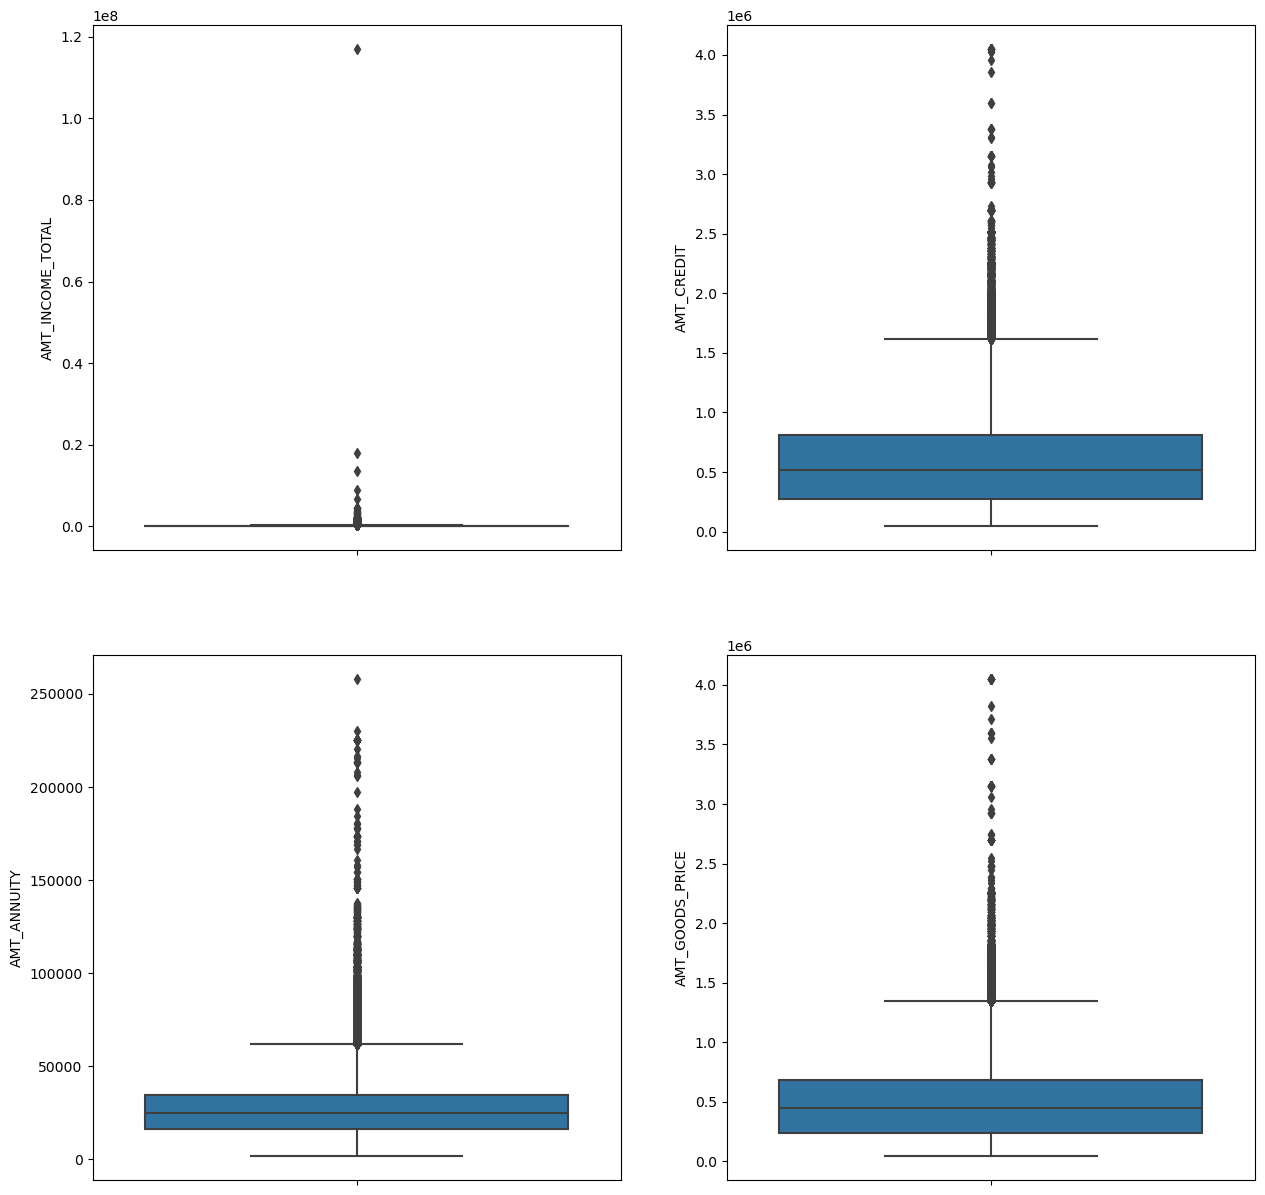

In [123]:
cols= ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(15,15))
count=0
for i in range(0,2):
    for j in range(0,2):
        sns.boxplot(y=application_data[cols[count]],ax=axes[i,j])
        count+=1
plt.show()

# suggestion

# AMT_INCOME_TOTAL
as we can see above columns have outliers
- in case of AMT_INCOME_TOTAL most of the data is arround 0 to 1m but there are some outliers with AMT_INCOME_TOTAL greater than 1.2B 
- so in case as outliers are complitly valid like they may be some highly successfull business people still they can lead to the inaccurate conclusions 
- so in these case we can cap the outliers

# AMT_CREDIT

- most of the AMT_CREDIT are with in 15m
- but there are some outliers which are at 40 M 
- in these case we can cap the outliers

# AMT_ANNUITY

- most of the data is below 70k
- and there are outliesr in large number as high as 250k
- cap the outliers

# AMT_GOODS_PRICE
- same in these case also as otliers are complitly valid we can cap them

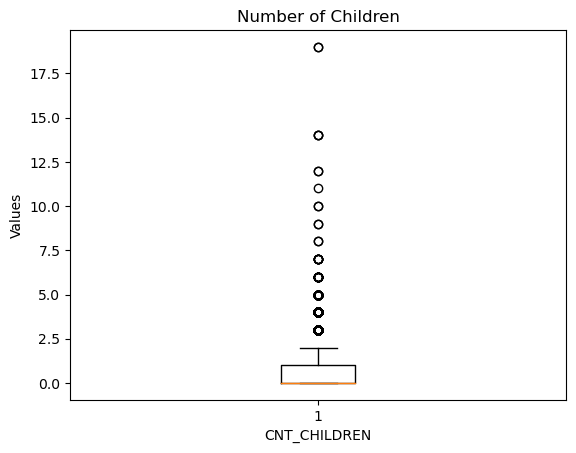

In [124]:
# Analysing CNT_CHILDREN column for Outliers
fig = plt.boxplot(application_data['CNT_CHILDREN'])
plt.title("Number of Children")
plt.xlabel("CNT_CHILDREN")
plt.ylabel("Values")

plt.show()

# suggestion

- as we can see there are vey low outliers in these data 
- moreover these are exception and do not apply to majority of people as we can see there are only 1 or 2 ids with CNT_CHILDREN greater than 12 
- in these as outliers are very low we can immpute them with mode .

In [125]:
# converting days employed to years employed
application_data['years_employed'] = application_data.DAYS_EMPLOYED/365

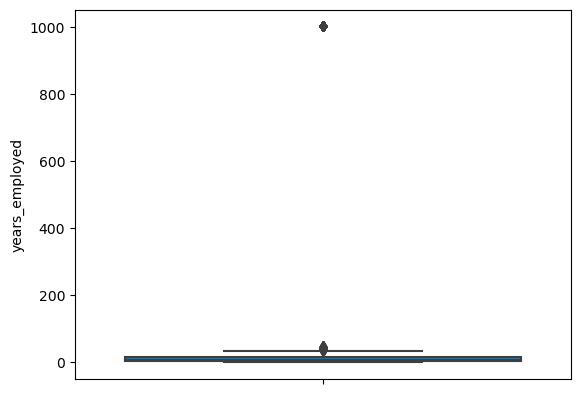

In [126]:
# Analysing days_EMPLOYED column for Outliers
sns.boxplot(y=application_data['years_employed'])
plt.show()

# suggestion
- in the above graph most of the data is in between 0 and 25 years
- we can see that there are some outliers about 1000 years which is complitly in valid so we can drop such data

# Analyzing AMT_REQ_CREDIT columns for Outliers

In [127]:
# making the list of features that start's with AMT_REQ
cols = [i for i in  application_data.columns if 'AMT_REQ' in i]
cols

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

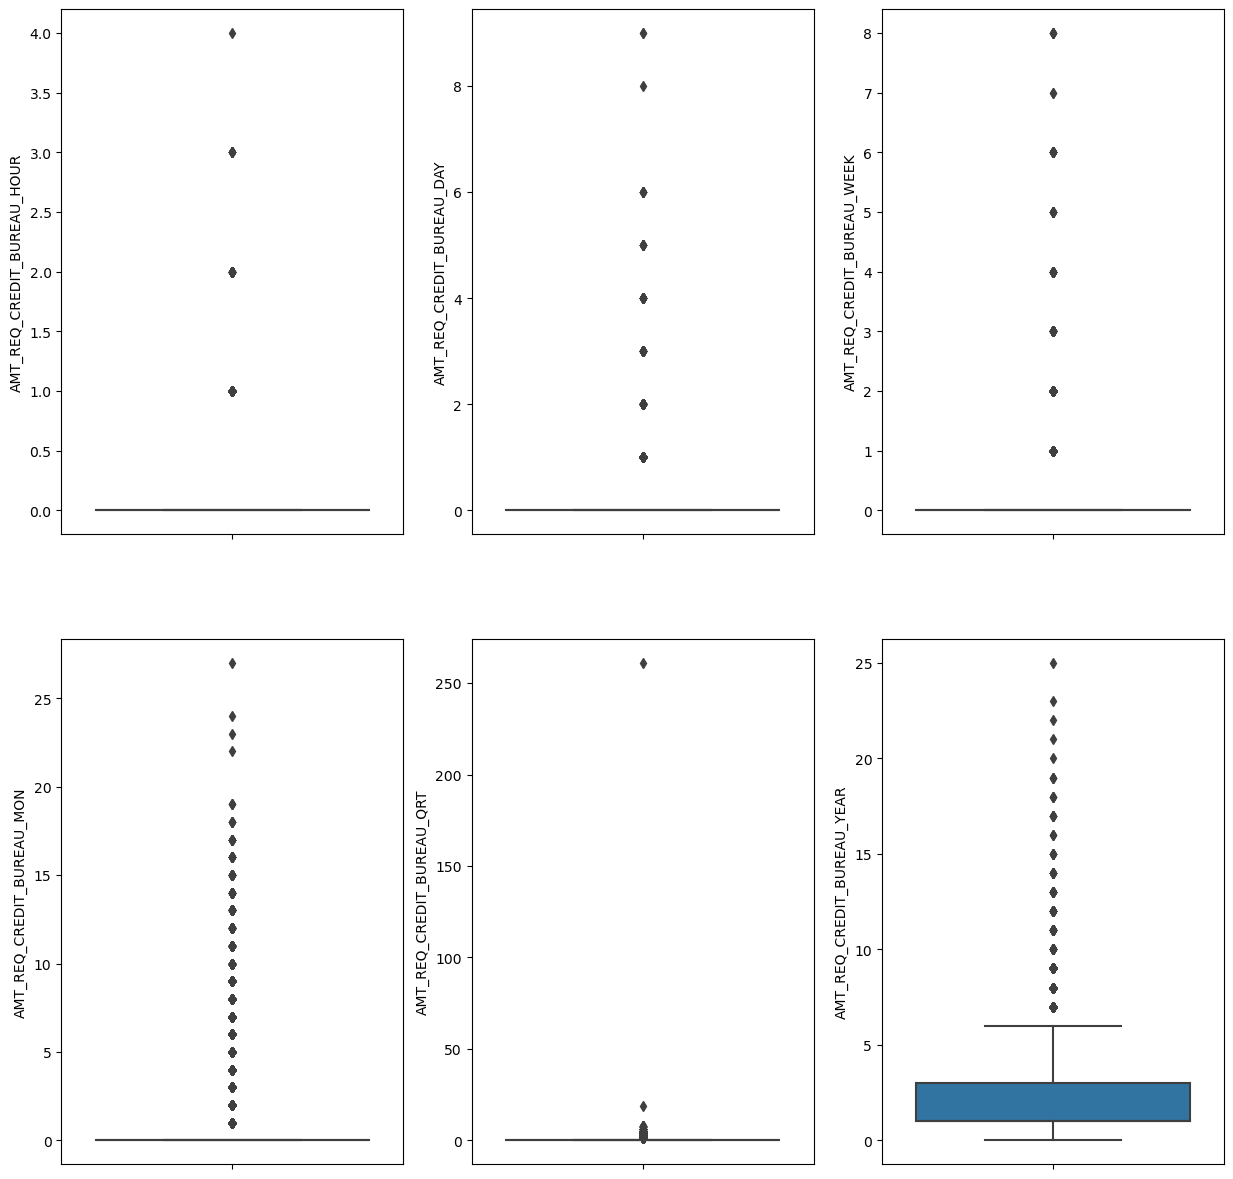

In [128]:
fig,axes = plt.subplots(ncols=3,nrows=2,figsize=(15,15))
count=0
for i in range(0,2):
    for j in range(0,3):
        sns.boxplot(y=application_data[cols[count]],ax=axes[i,j])
        count+=1
plt.show()

# suggestion
- most of the outliers in the above graphs seems to valid one so we can cap those outliers
- but AMT_REQ_CREDIT_QRT have the outlier which is 250 which seems to be any outlier when compaied to AMT_REQ_CREDIT_YEAR because how can a person have 250 visists in a qrt and also 25 in a year but it is complitly valid outlier because according to the definatio of the AMT_REQ_CREDIT_YEAR its the number of visits in a year excluding the Quaterly one
- so we can cap the outlier in the above cases

# Univariate Analysis

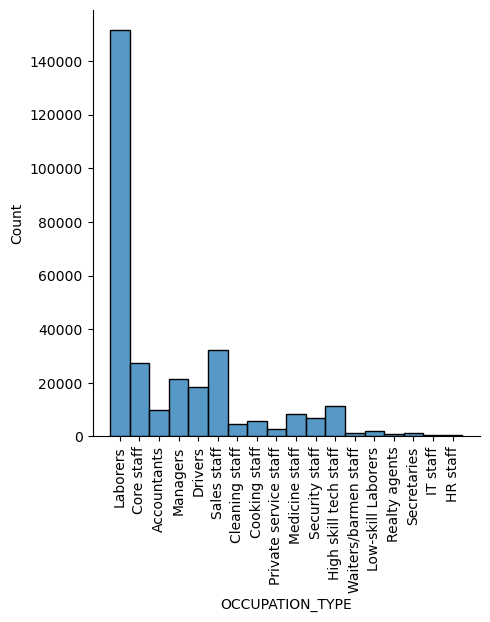

In [129]:
# ploting the distribution for occupation type
sns.displot(application_data.OCCUPATION_TYPE)
plt.xticks(rotation=90)
plt.show()

# obsevations
- laborers have taken the most amount of loans followd by sales staff

- HR staff has taken the least of the loans


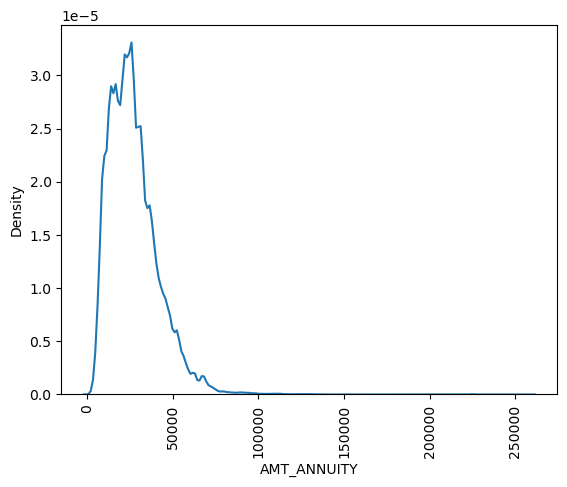

In [130]:
# ploting the distribution for AMT_ANNUITY
sns.kdeplot(application_data.AMT_ANNUITY)
plt.xticks(rotation=90)
plt.show()

# obsevation
- most of the loan taken for AMT_ANNUITY in between 0 and 50000

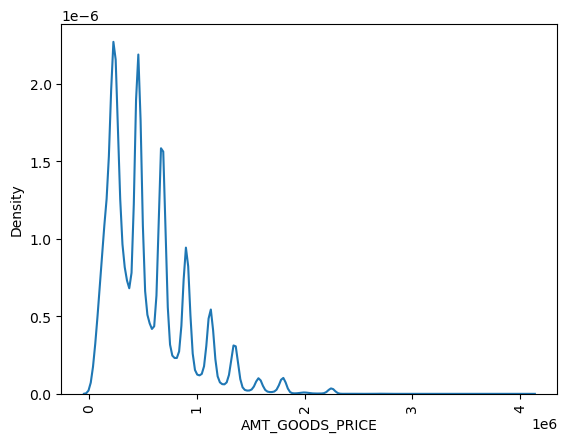

In [131]:
# ploting the distribution for AMT_GOODS_PRICE
sns.kdeplot(application_data.AMT_GOODS_PRICE)
plt.xticks(rotation=90)
plt.show()

# obsevations
- most of the people taken the loan AMT_GOODS PRICE between 0 and 1m and it is left-skewed 

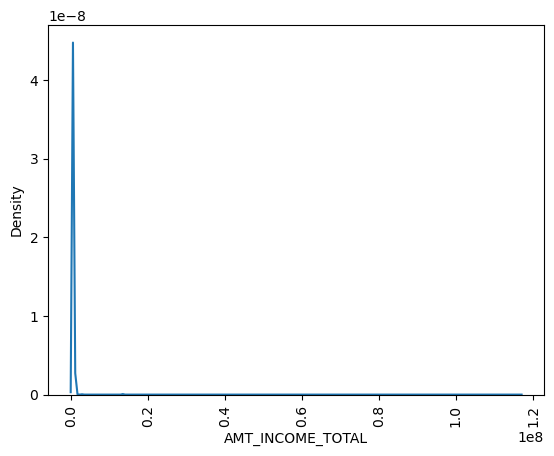

In [132]:
# ploting the distribution for AMT_INCOME_TOTAL
sns.kdeplot(application_data.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)
plt.show()

# obsevation
- most of the people who took taken the loan are having salalry between 0 and 1m

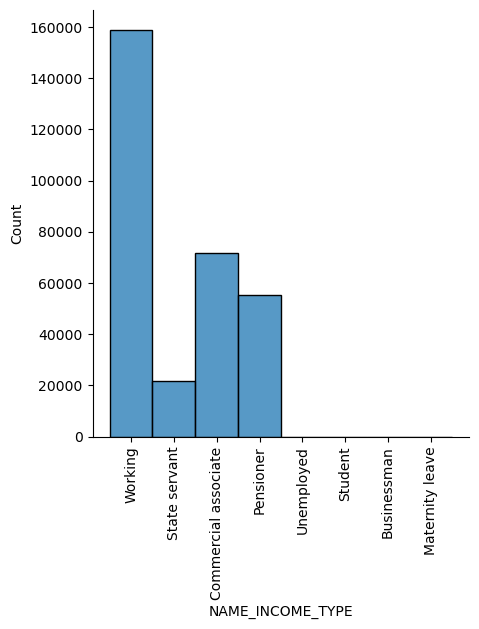

In [133]:
# ploting the distribution for NAME_INCOME_TYPE
sns.displot(application_data.NAME_INCOME_TYPE)
plt.xticks(rotation=90)
plt.show()

# obsevation
- working people has taken the most of the loans 
- business and maternity leave are the least

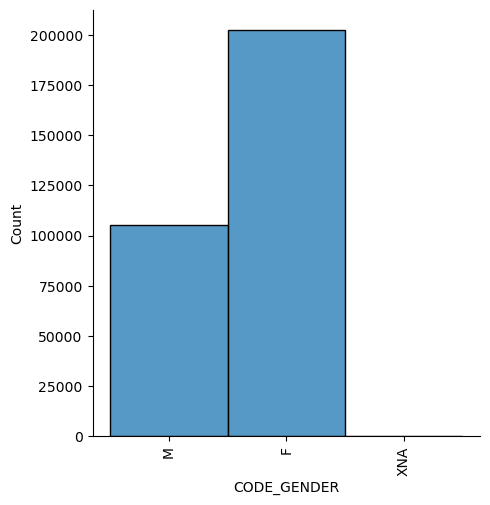

In [134]:
# ploting the distribution for CODE_GENDER
sns.displot(application_data.CODE_GENDER)
plt.xticks(rotation=90)
plt.show()

# obsevation
- females have taken the 50% more loan than male

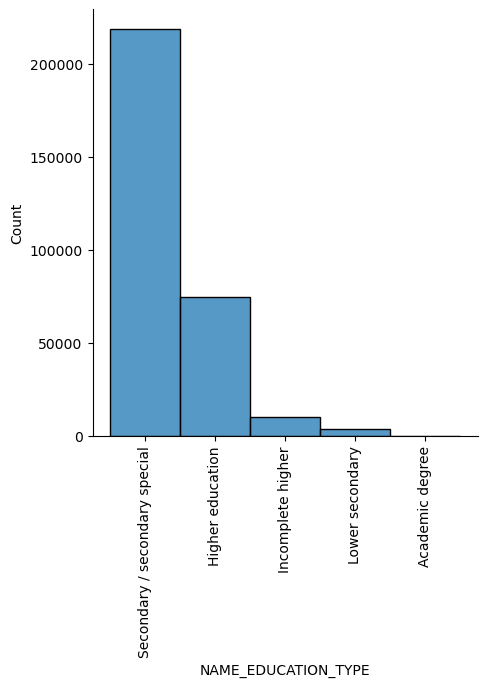

In [135]:
# ploting the distribution for NAME_EDUCATION_TYPE
sns.displot(application_data.NAME_EDUCATION_TYPE)
plt.xticks(rotation=90)
plt.show()

# obsevation
- people who have complited secounday are takeing the most loans

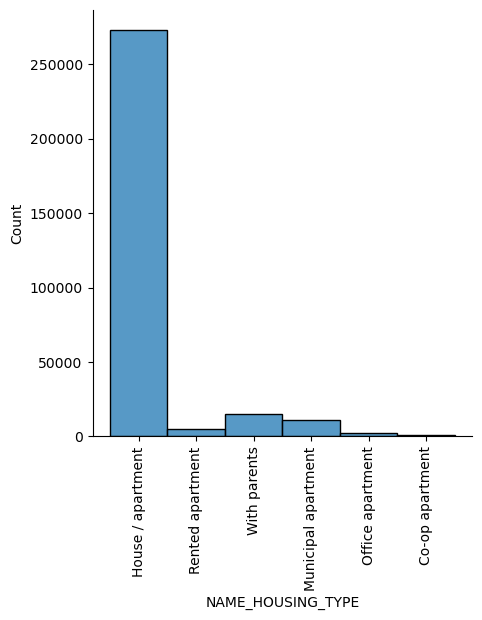

In [136]:
# ploting the distribution for NAME_HOUSING_TYPE
sns.displot(application_data.NAME_HOUSING_TYPE)
plt.xticks(rotation=90)
plt.show()

# obsevations
- people who living in the house or appartment has taken the most loan

# Bivariate Analysis and  Multivariate analysis

# Segment- 1:  Numerical categorical variable

In [137]:
# making a list of amt var
num_df = application_data.select_dtypes(include=['float64','int64'])
num_list = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

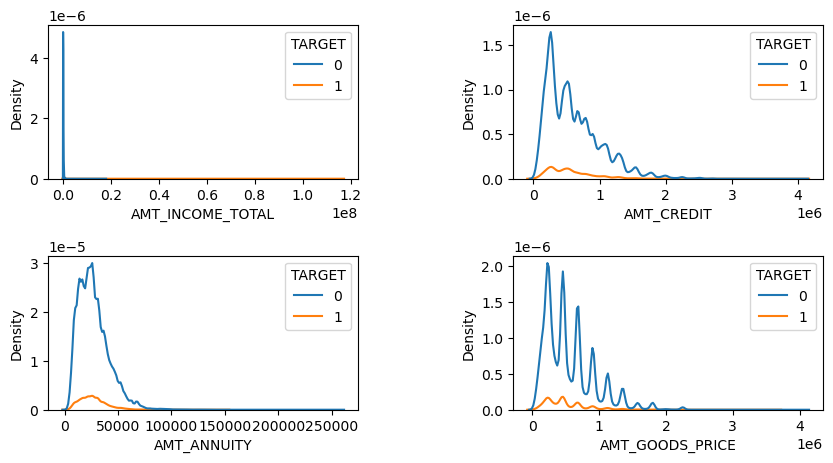

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

for i, col in enumerate(num_list):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data=num_df, x=col, hue='TARGET')
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()




# observation

- most of the loans were given for the goods price of ranging between 0 to 1m
- most of the loans were given for the AMT_CREDIT of ranging between 0 to 1m
- most of the customers paying AMT_ANNUITY between 0 to 50000
- most of the customers who taken having income between 0 to 1m

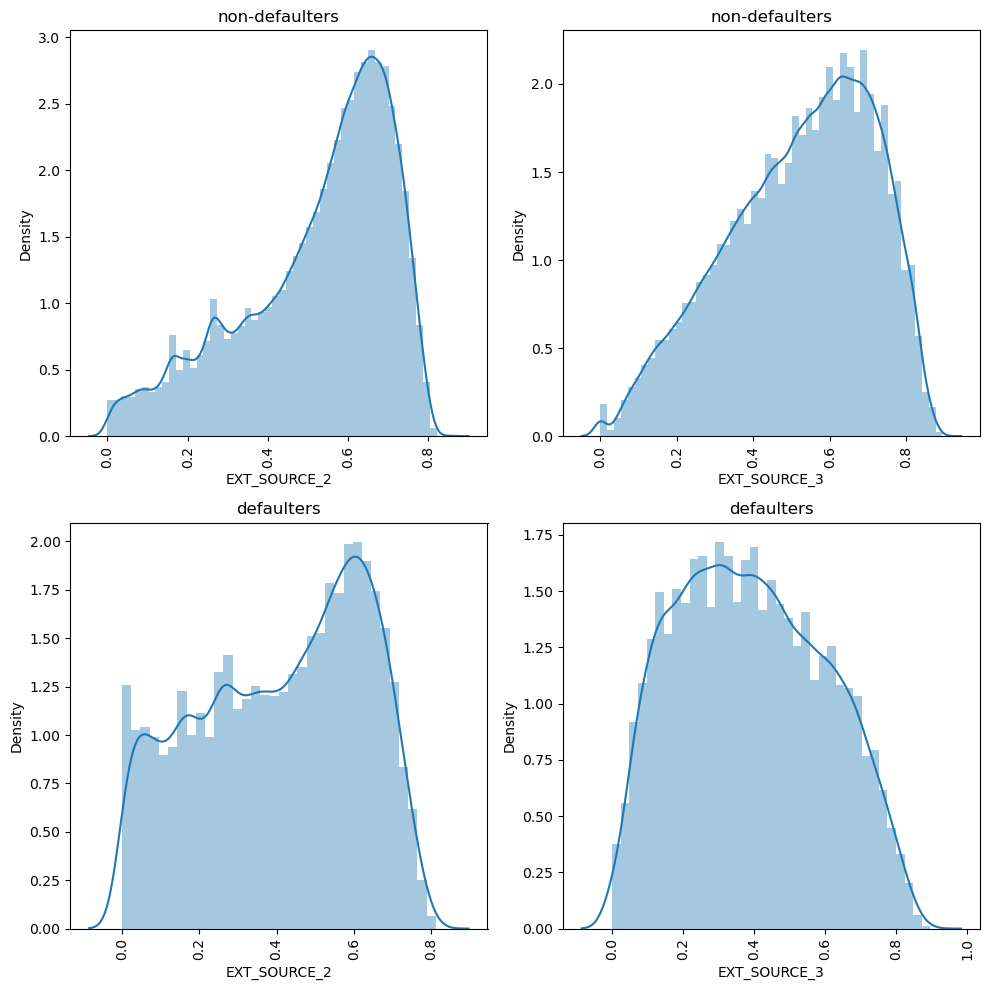

In [139]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate([ 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    if i < 2:
        target=0 # first row for non-defaulters
    else:
        target=1 # second row for defaulters
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(application_data[application_data["TARGET"] == target][j])
    if target==1:
        plt.title('defaulters')
    else:
         plt.title('non-defaulters')
        
    plt.xticks(rotation=90)
    plt.tight_layout()

- 'EXT_SOURCE_2' have same distribution for defaulters and non-defaulters.
- 'EXT_SOURCE_3' have very different distribution for defaulters and non-defaulters.


# Segment- 2: Categorical categorical variable

object type data is called categorical data in which we can create different categories to do analysis

In [140]:
# making the list of  object type features
catgl_features = application_data.select_dtypes(include=['object']).columns
catgl_features

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

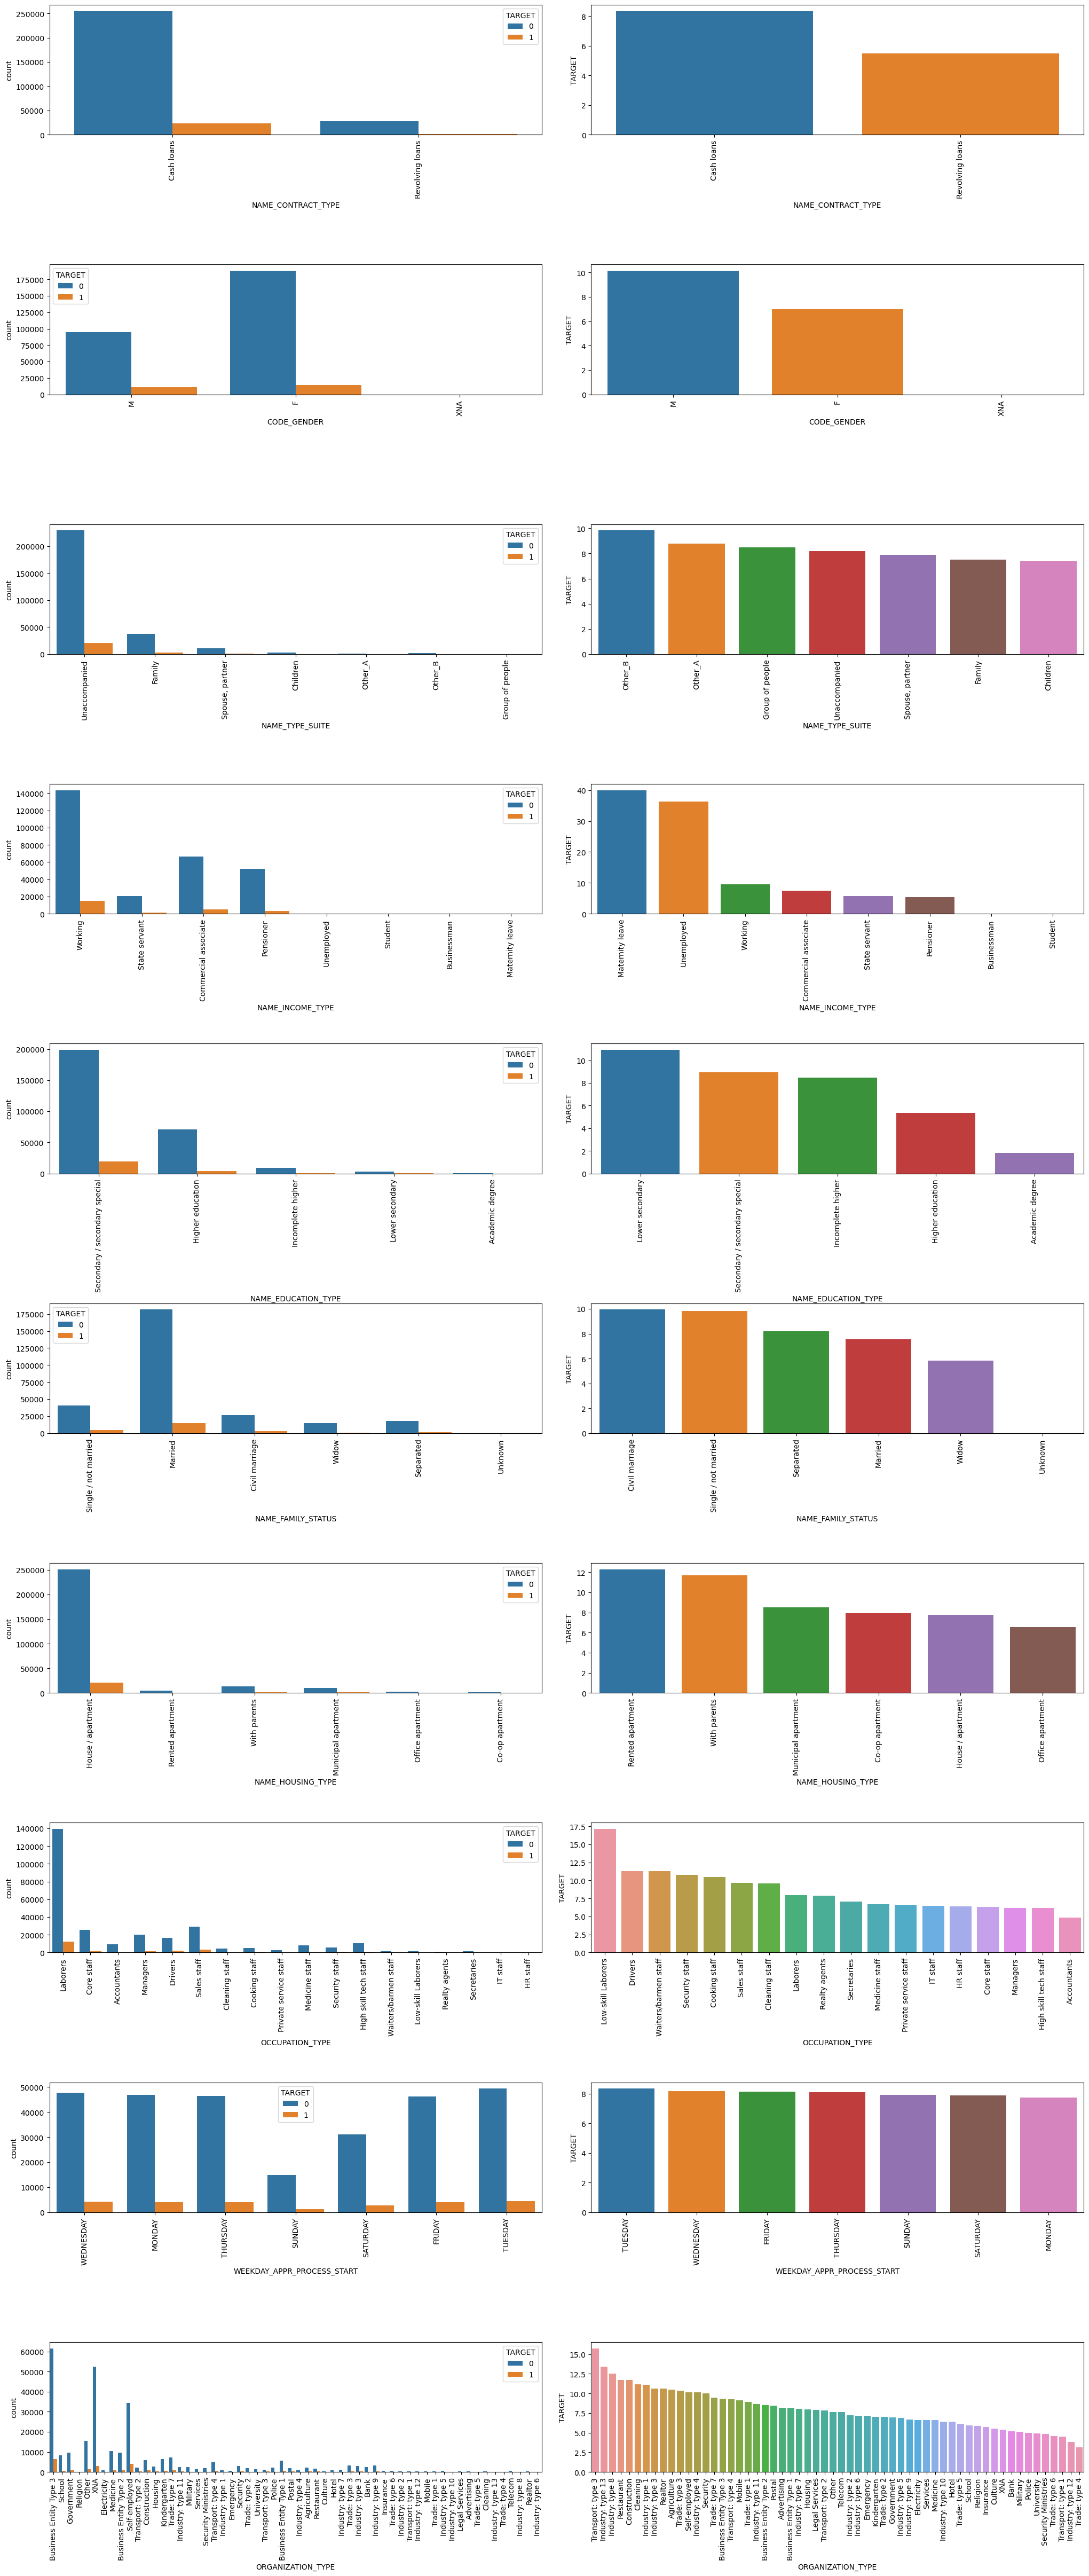

In [141]:
# ploting categorical features with target feature
plt.figure(figsize=(25,60))
 
for i,col in enumerate(catgl_features):
    catgl_features_target = application_data[[col,'TARGET']].groupby([col],as_index=False).mean().sort_values(by ='TARGET',ascending=False)
    catgl_features_target.TARGET = catgl_features_target.TARGET*100
    
    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    sns.countplot(data=application_data,x=col,hue='TARGET')
    plt.xticks(rotation = 90)
    
    plt.subplot(10,2,i+i+2)
    sns.barplot(data=catgl_features_target,x=col,y='TARGET')
    plt.xticks(rotation = 90)
    
    

# obsevation

# code gende
- most loans are taken by females than males 
- males are more likely to default the loan than females

# NAME_TYPE_SUTE
- Most of the applicants are unaccompanied while applying for loan
- from above graphs other_B has highest default rate than others but there is very less data to conclude that so we can say that unaccompanied is the safest because its default percentage is about 8 despite being the most dominating in numbers

# NAME_INCOM_TYPE
- although most of the data is in working,commercialassociate and pensioner they still have very low default percentage.

# NAME_EDUCATION_TYPE
- higher education is the safest segment because itd default rate is arround 5%


# FAMILY STATUS
- civil has the highest default rate widow has the lowest default rate but loans geven to the widows are not high enoug so we can conclude that married segment is the safest because it has given the majority of loans even after that the default rate is less than 8%

# HOUSING TYPE
- people who are leaving in rental appartment and with parents are the worest segment with default rate about 12% and people who are having their own apartment or house are the best segment with low default of less than 8%


# OCCUPATION type
- low-skill laborers are most likely to default but as the loan given to them is very low so we can conclude that drivers are the most risky segment
- accountants, managers and core staff has a low default rate arround 5% and but if we cnosider the unknown segment which is taking most of the loan and still has low default of 6%


#  WEEK DAY OF APPLICATION
- All weekdays have similar number of applicants than weekend(Saturday and Sunday) despite that all weekdays have alomst same default rate so we can say that saturday and sunday are not the best option .
- we can see that despite the high number of applications on monday it is still maintaing low default
-- NOTE : almost all weekdays have same number of default rates its good to ignore these feature


# organisation type
- transport type:3 has highest defaulter rate
- others,schools and government is the best option we have
- business entity still have a good default rate about 9% even after being the category which took most

In [142]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,years_employed
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.745205
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.254795
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.616438
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,8.326027
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,8.323288


In [143]:
# making data frame defaulters from application
defaulters = num_df[num_df['TARGET']==1].drop(['TARGET','SK_ID_CURR'],axis=1)
defaulters.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,years_employed
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.745205
26,0,112500.0,979992.0,27076.5,702000.0,0.018029,18724,2628,6573.0,1827,1.0,3,2,9,0,0,0,0,0,0,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0,7.200000
40,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,1182.0,1029,2.0,2,2,9,0,0,0,0,0,0,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,3.457534
42,0,135000.0,288873.0,16258.5,238500.0,0.007305,13384,3597,45.0,4409,2.0,3,3,11,0,0,0,0,0,0,0.674203,0.399676,1.0,0.0,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0,9.854795
81,0,81000.0,252000.0,14593.5,252000.0,0.028663,24794,365243,5391.0,4199,2.0,2,2,10,0,0,0,0,0,0,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.665753


In [144]:
# making data frame non defaulters from application

non_defaulters = defaulters = num_df[num_df['TARGET']==0].drop(['TARGET','SK_ID_CURR'],axis=1)
defaulters.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,years_employed
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.254795
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.616438
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,8.326027
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,8.323288
5,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,477,2.0,2,2,16,0,0,0,0,0,0,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0,4.350685


# finding top 10 correlationa

In [145]:
# top 10 correlation for defaulters
corr__1 = defaulters.corr()
final_corr_1 = corr__1.where(np.triu(np.ones(corr__1.shape),k=1).astype(np.bool))
final_corr_1 = final_corr_1.unstack().reset_index()
final_corr_1 = final_corr_1.rename(columns={'level_0':'column1','level_1':'column2',0:'correlation'})
final_corr_1.correlation = abs(final_corr_1.correlation)
final_corr_1 = final_corr_1.sort_values('correlation',ascending=False)

defaulters_10_corr = final_corr_1[:11]
defaulters_10_corr

,column1,column2,correlation
1129,years_employed,DAYS_EMPLOYED,1.000000
838,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
138,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
419,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
340,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
559,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
873,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
664,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
139,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
104,AMT_ANNUITY,AMT_CREDIT,0.771297


In [146]:
# top 10 correlations for non defaulters
corr__0 = non_defaulters.corr()
final_corr_0 = corr__0.where(np.triu(np.ones(corr__0.shape),k=1).astype(np.bool))
final_corr_0 = final_corr_0.unstack().reset_index()
final_corr_0 = final_corr_0.rename(columns={'level_0':'column1','level_1':'column2',0:'correlation'})
final_corr_0.correlation = abs(final_corr_0.correlation)
final_corr_0 = final_corr_0.sort_values('correlation',ascending=False)

non_defaulters_10_corr = final_corr_1[:11]
non_defaulters_10_corr

,column1,column2,correlation
1129,years_employed,DAYS_EMPLOYED,1.000000
838,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
138,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
419,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
340,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
559,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
873,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
664,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
139,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
104,AMT_ANNUITY,AMT_CREDIT,0.771297


# observation

# Segment-3  : Numeric- numeric analysis

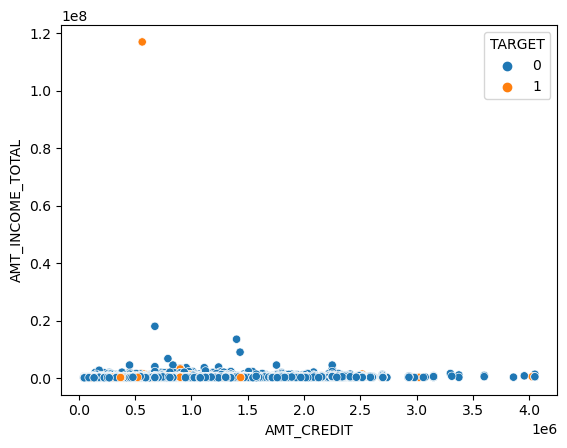

In [147]:

sns.scatterplot(data=application_data,x='AMT_CREDIT',y='AMT_INCOME_TOTAL',hue='TARGET')
plt.show()

# obsevation
- people who are earning less than a million and  taking a loan of less than 1.5 million are more likely to become a defaulter and vice versa

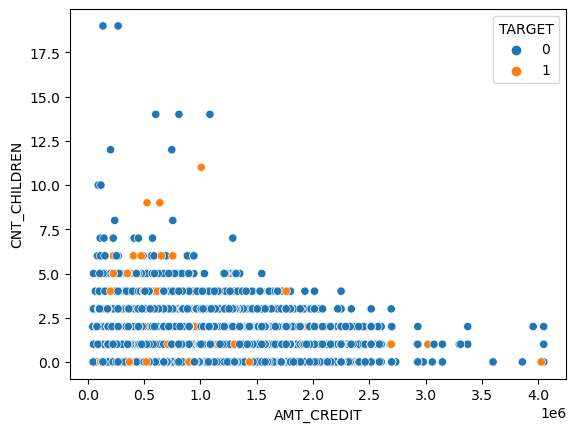

In [148]:
sns.scatterplot(data=application_data,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')
plt.show()

# obsevation
- people having children less than 5 are the safe to give loan 

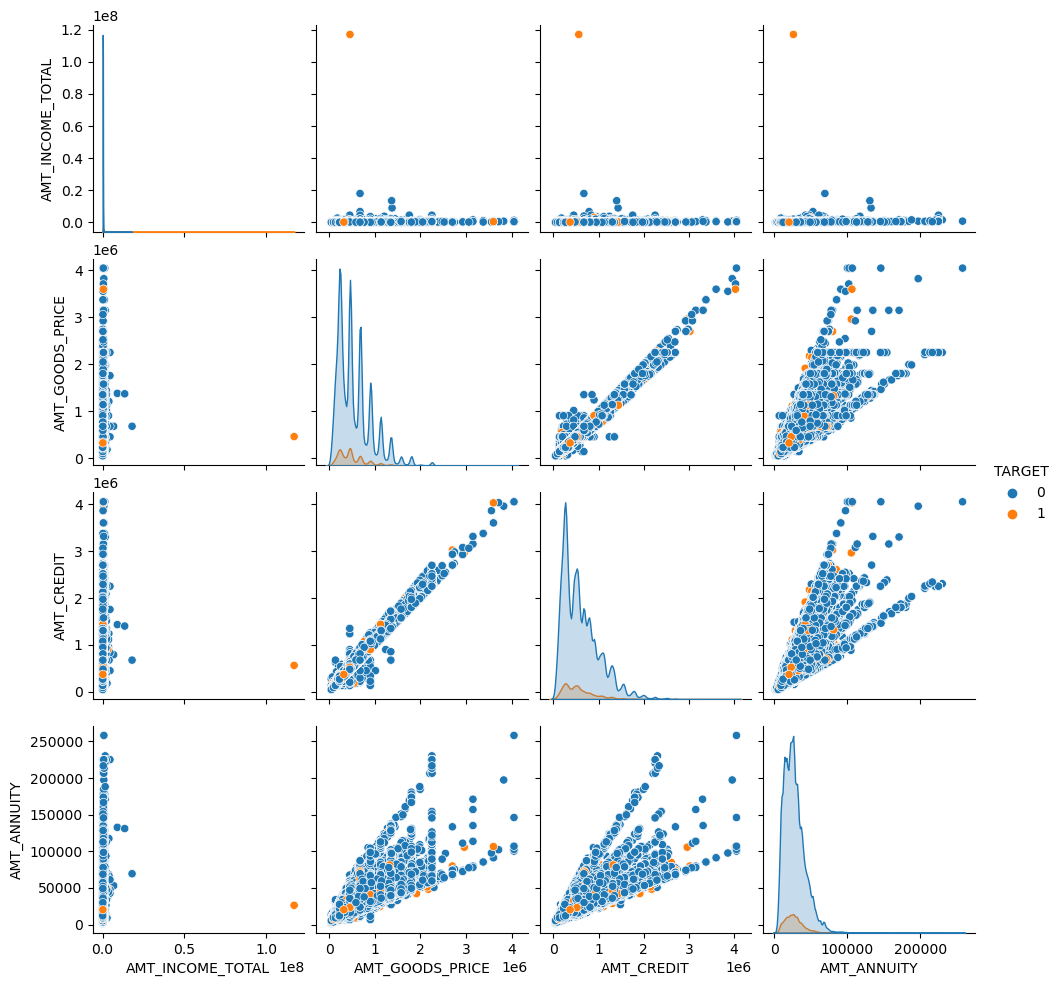

In [149]:
# ploting the scatter plots
sclice_df = application_data[['AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY','TARGET']]

sns.pairplot(data=sclice_df, hue='TARGET')
plt.show()

# observation
- amount credict and amount goods price are correlated
- people having income less than 1m are more likely to take loan



- people who can pay amount annuity of 100k are more like to get the loan and that's upto less than 2 m and also are saffer to give the loan

# Data Analysis on Previous Application dataset

In [150]:
# reading the previous application data
previous_application = pd.read_csv("previous_application.csv")

In [151]:
# head of previous applicatio data
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# shape of previous application data
previous_application.shape

(1670214, 37)

# obsevation
- we are 22 features in previous application data

# handling the null values

In [153]:
# checking the null value percentage
null_count = pd.DataFrame(previous_application.isnull().sum().sort_values(0,ascending=False)/previous_application.shape[0]*100).reset_index().rename(columns={'index':'var',0:'count_pct'})
null_count

,var,count_pct
0,RATE_INTEREST_PRIVILEGED,99.643698
1,RATE_INTEREST_PRIMARY,99.643698
2,AMT_DOWN_PAYMENT,53.636480
3,RATE_DOWN_PAYMENT,53.636480
4,NAME_TYPE_SUITE,49.119754
5,NFLAG_INSURED_ON_APPROVAL,40.298129
6,DAYS_TERMINATION,40.298129
7,DAYS_LAST_DUE,40.298129
8,DAYS_LAST_DUE_1ST_VERSION,40.298129
9,DAYS_FIRST_DUE,40.298129


In [154]:
# list of col with more than 40%
var_misg_40 = list(null_count[null_count['count_pct']>=40]['var'])
var_misg_40

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [155]:
# len before droping var's
len(previous_application.columns)

37

In [156]:
# creating list of unimportatnt var along with var_misg_40
droping_var = var_misg_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',"FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY"]
len(droping_var)

15

In [157]:
previous_application = previous_application.drop(labels=droping_var,axis=1)

In [158]:
# features which have missing values after droping
pd.DataFrame(previous_application.isnull().sum().sort_values(0,ascending=False)/previous_application.shape[0]*100).reset_index().rename(columns={'index':'var',0:'count_pct'})


,var,count_pct
0,AMT_GOODS_PRICE,23.081773
1,AMT_ANNUITY,22.286665
2,CNT_PAYMENT,22.286366
3,PRODUCT_COMBINATION,0.020716
4,AMT_CREDIT,0.000060
5,NAME_GOODS_CATEGORY,0.000000
6,NAME_YIELD_GROUP,0.000000
7,NAME_SELLER_INDUSTRY,0.000000
8,SELLERPLACE_AREA,0.000000
9,CHANNEL_TYPE,0.000000


In [159]:
previous_application['AMT_GOODS_PRICE'].agg(func=['mean','median'])

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [160]:
previous_application['AMT_GOODS_PRICE_MEDIAN'] = previous_application.AMT_GOODS_PRICE.fillna(previous_application.AMT_GOODS_PRICE.median())  

previous_application['AMT_GOODS_PRICE_MEAN'] = previous_application.AMT_GOODS_PRICE.fillna(previous_application.AMT_GOODS_PRICE.mean())  

previous_application['AMT_GOODS_PRICE_MODE'] = previous_application.AMT_GOODS_PRICE.fillna(previous_application.AMT_GOODS_PRICE.mode())  



checking which method of imputation is more identical to the original one

In [161]:
gp_cols =['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']

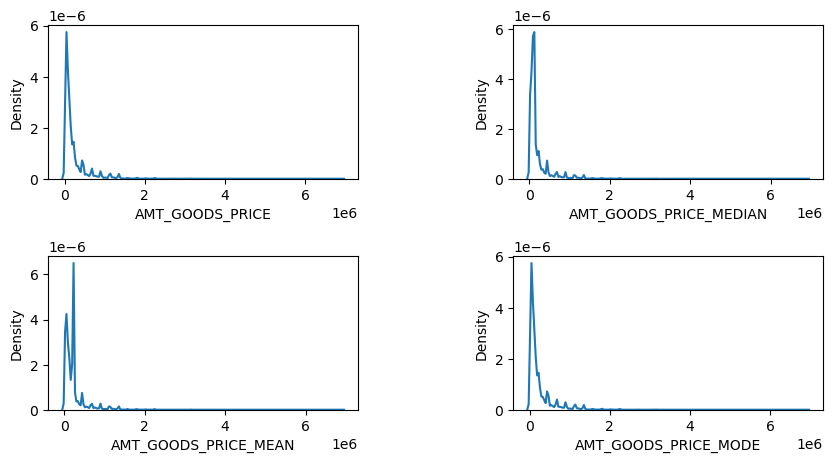

In [162]:
plt.figure(figsize=(10,5))

for i,col in enumerate(gp_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=previous_application,x=col)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

# obsevation

- from the above graph median seems to be exactly similar to that of befor so we can go with median

In [163]:
# droping thses features created for convinience
previous_application.drop(gp_cols[1:],axis=1,inplace=True)

In [164]:
# replacing null values with median
previous_application.AMT_GOODS_PRICE.fillna(previous_application.AMT_GOODS_PRICE.median(),inplace=True)

In [165]:
# checking the null values 
previous_application.AMT_GOODS_PRICE.isnull().sum()

0

In [166]:
# filling AMT_ANNUITY with median
print("befor : ",previous_application.AMT_ANNUITY.isnull().sum())
previous_application.AMT_ANNUITY.fillna(previous_application.AMT_ANNUITY.median(),inplace=True)
print("after : ",previous_application.AMT_ANNUITY.isnull().sum())

befor :  372235
after :  0


In [167]:
# product_combination
previous_application.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [168]:
# as above one is the categorical so using mode
previous_application.PRODUCT_COMBINATION.fillna(previous_application.PRODUCT_COMBINATION.mode()[0],inplace=True)

In [169]:
# CNT_PAYMENT
previous_application.CNT_PAYMENT.agg(func=['mean','median','max'])

mean      16.054082
median    12.000000
max       84.000000
Name: CNT_PAYMENT, dtype: float64

In [170]:
# checking CNT_PAYMENT w.r.t NAME_CONTRACT_STATUS
previous_application[previous_application.CNT_PAYMENT.isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

from the above observation we can see that most of the null values of CNT_PAYMENT NAME_CONTRACT_STATUS is cancelled so if we imputed using median or mean then it will be incorrect so we are filling them with zero

In [171]:
previous_application.CNT_PAYMENT.fillna(0,inplace=True)

In [172]:
previous_application.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                1
SK_ID_PREV                0
NAME_CLIENT_TYPE          0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_GOODS_CATEGORY       0
CODE_REJECT_REASON        0
SK_ID_CURR                0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
PRODUCT_COMBINATION       0
dtype: int64

# Changing negative values in the DAYS columns to positive values

In [173]:
days = []
for i in previous_application.columns:
    if 'DAYS' in i:
        days.append(i)
        print('Unique Values in {0} column : {1}'.format(i,previous_application[i].unique()))
        print()

Unique Values in DAYS_DECISION column : [  -73  -164  -301 ... -1967 -2389    -1]



In [174]:
previous_application[days]= abs(previous_application[days])

In [175]:
# checking days col
previous_application[days].head()

,DAYS_DECISION
0,73
1,164
2,301
3,512
4,781


# Univariate Analysis on Previous Application Data


In [176]:
# checking the columns we have in previous data
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

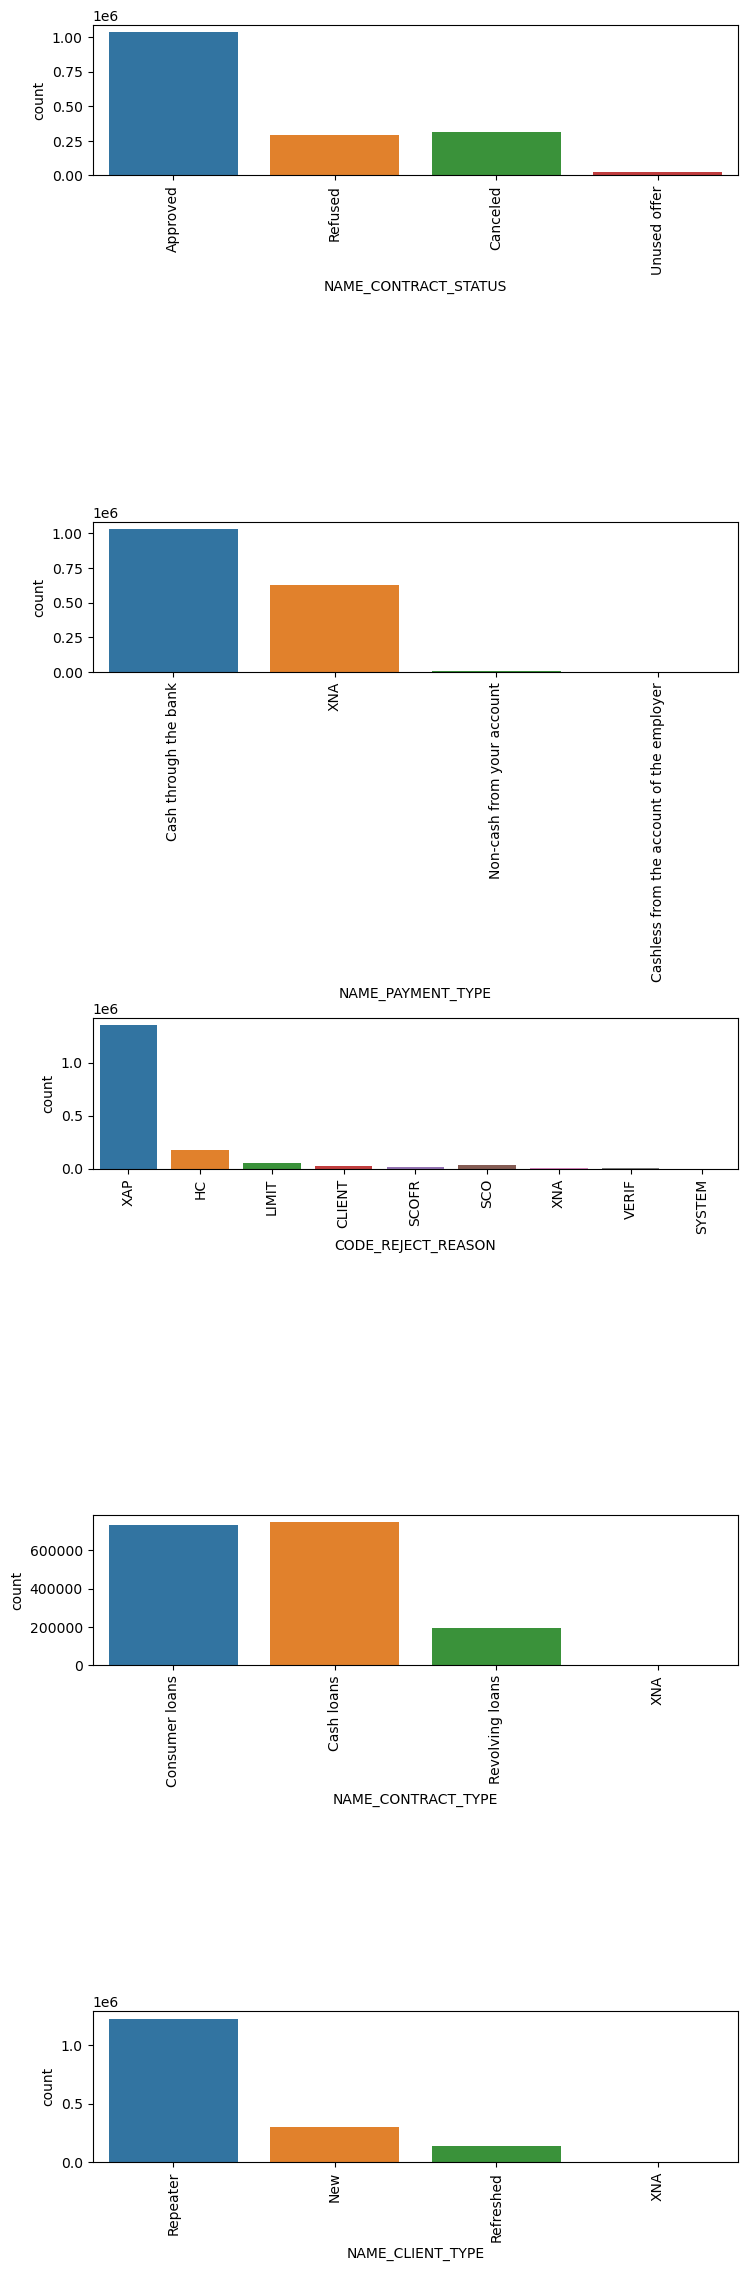

In [177]:
cols = ['NAME_CONTRACT_STATUS',
        'NAME_PAYMENT_TYPE','CODE_REJECT_REASON', 
        'NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE']

# Plot categorical features with target feature
plt.figure(figsize=(25, 60))

for i, col in enumerate(cols):
    plt.subplot(10, 2, i + i + 1)
    plt.subplots_adjust(wspace=1, hspace=2.3)  # Increase hspace for more vertical spacing
    sns.countplot(previous_application[col])
    plt.xticks(rotation=90)

plt.show()



# obsevation
- most of the loans are approved
- most of the are cash through the bank type
- XAP is the most frequent reason for loan rejection
- consumer loans and cash loans are alomst same in quantity
- most of the loan is given to the repeating type client

# bivarient analysis

# categorical vs catgorical

<Figure size 2000x2000 with 0 Axes>

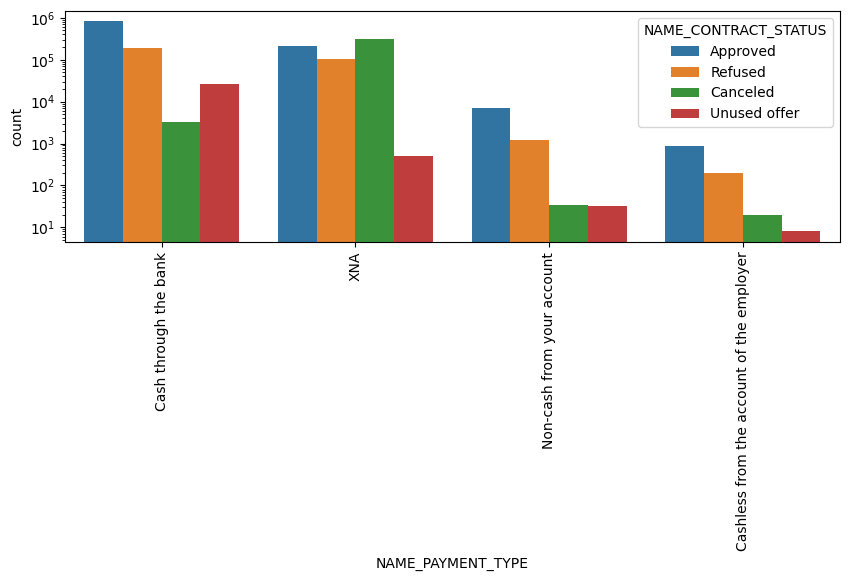

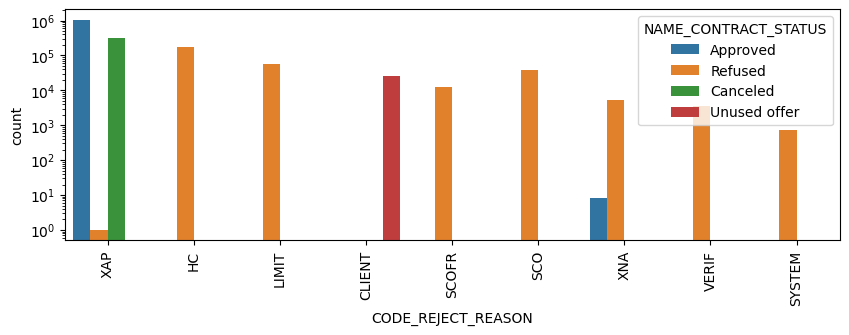

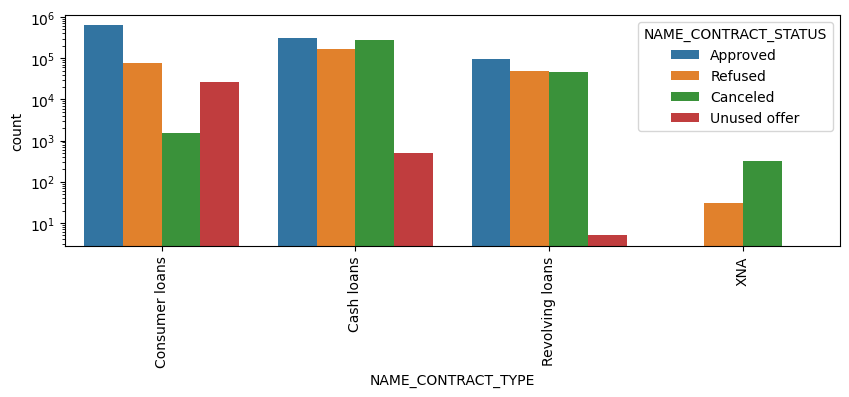

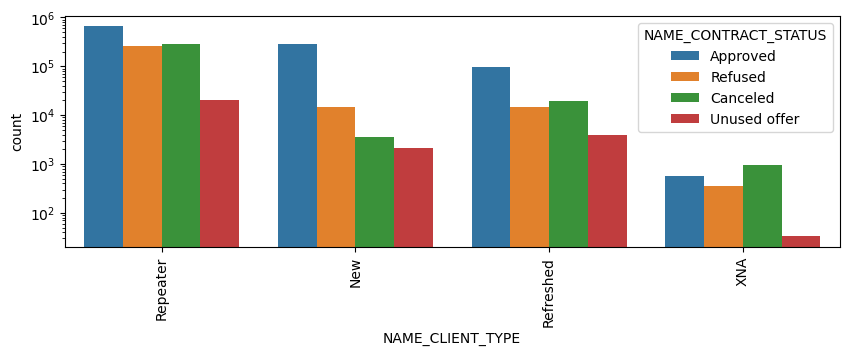

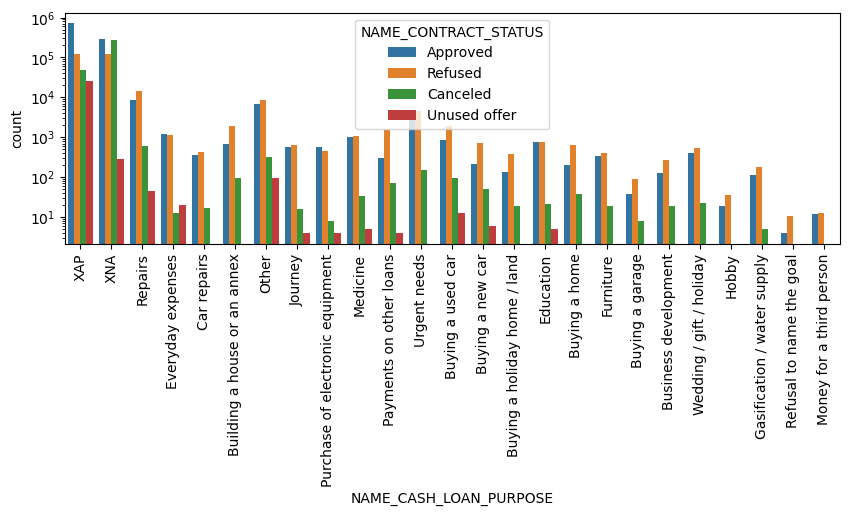

In [186]:
# ploting categorical features with respect to NAME_CONTRACT _STATUS
cols = ['NAME_PAYMENT_TYPE','CODE_REJECT_REASON', 
        'NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_CASH_LOAN_PURPOSE']

# Plot categorical features with target feature
plt.figure(figsize=(20, 20))

for i, col in enumerate(cols):
    
    plt.figure(figsize=(10,3))
    sns.countplot(data = previous_application,x = col,hue='NAME_CONTRACT_STATUS')
    plt.xticks(rotation=90)
    plt.yscale('log')
    
    
plt.show()

# numerical vs numerical

In [187]:
# Extracting the numeric features from previous application data

numeric_features_prev = previous_application.select_dtypes(include=['int8','int16','int32','int64','float16','float32','float64']).columns       
print(numeric_features_prev)

Index(['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT'],
      dtype='object')


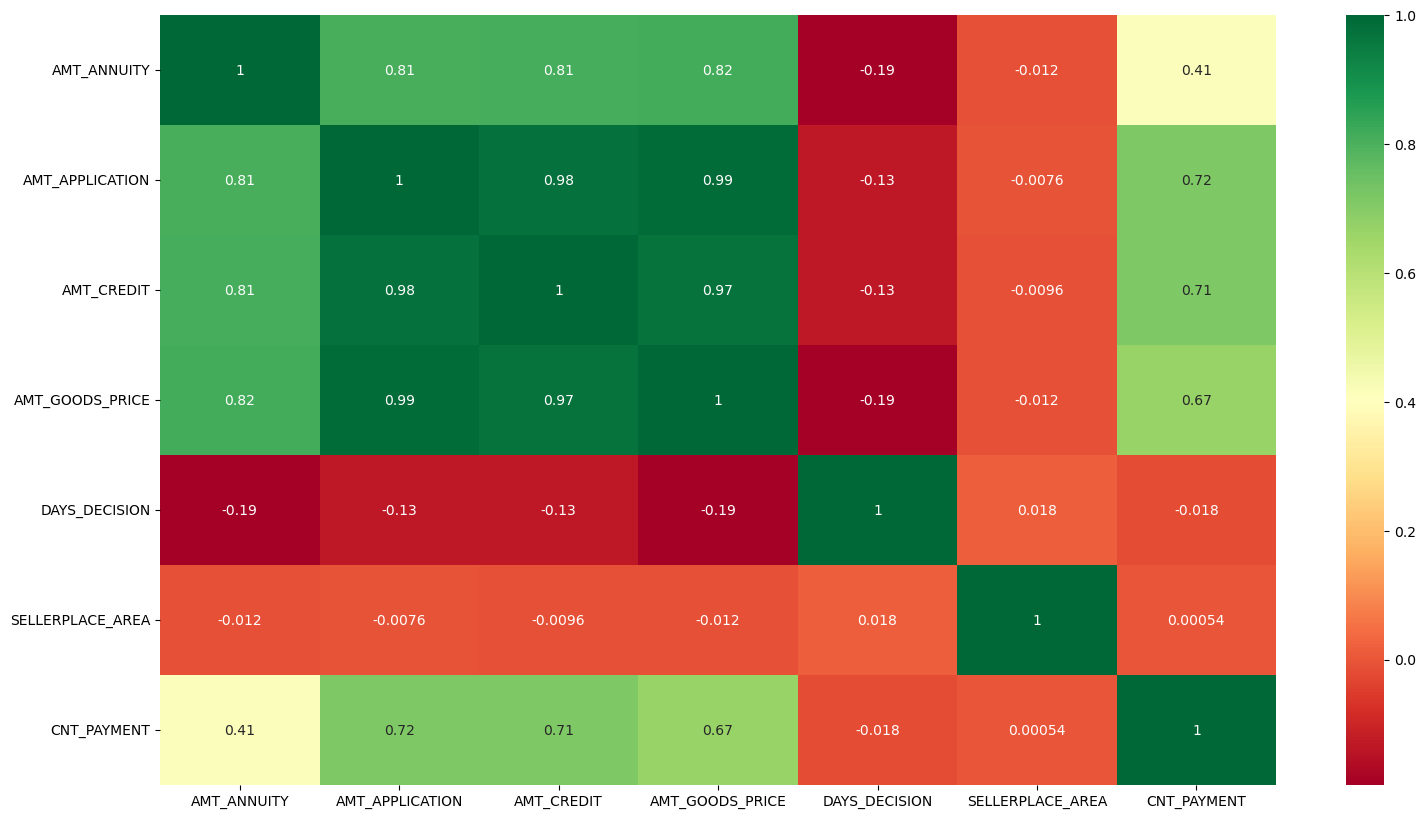

In [180]:
# Checking correlation between numeric features of previous application data

plt.figure(figsize=(18,10))
sns.heatmap(previous_application[numeric_features_prev].drop(['SK_ID_PREV', 'SK_ID_CURR'],axis=1).corr(), annot=True,cmap="RdYlGn")
plt.show()

In [181]:
# droping feature SK_ID_PREV as its of no use
previous_application.drop(['SK_ID_PREV'], axis=1, inplace=True)

# merging the datasets

In [182]:
# merging the data
merged_df = pd.merge(application_data,previous_application,how = 'inner',on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,years_employed,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1.745205,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.254795,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.254795,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,3.254795,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.616438,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


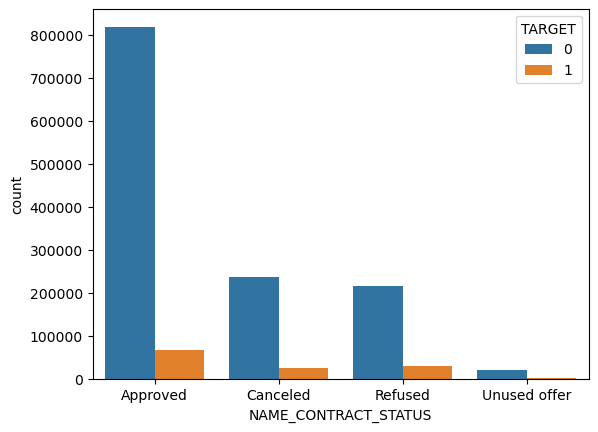

In [183]:
# seeing what happend to the aprove , canceled etc loan in current data

sns.countplot(data=merged_df,x='NAME_CONTRACT_STATUS',hue='TARGET')
plt.show()

# obsevation
- most of the loans were approved as compaired with other name contract status

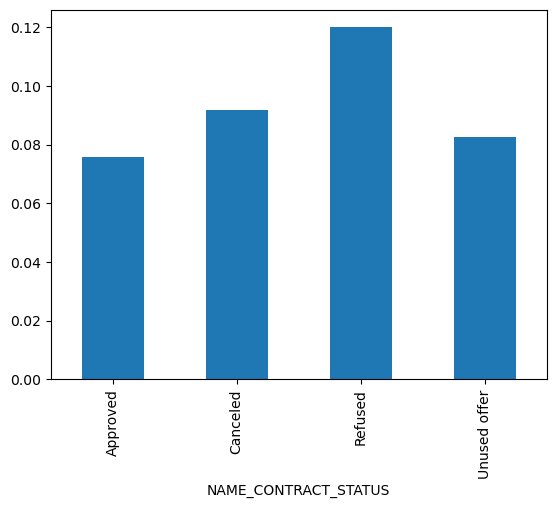

In [184]:
# ploting NAME_CONTRACT_STATUS according to the default rates

merged_df.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean().plot.bar()
plt.show()

# observation
- most of the application were of approved category
- default rate is highest for refused
- approved are the safest among all

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

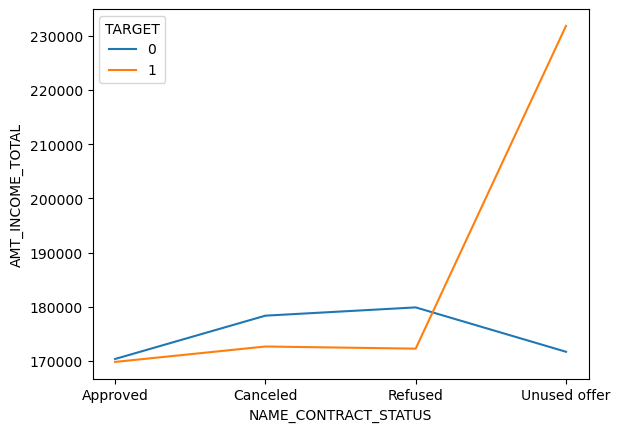

In [185]:
sns.lineplot(data = merged_df,x = 'NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci =None,hue ='TARGET')

# observation
- unused offer have maximun number of defaults even for customers with high salary

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

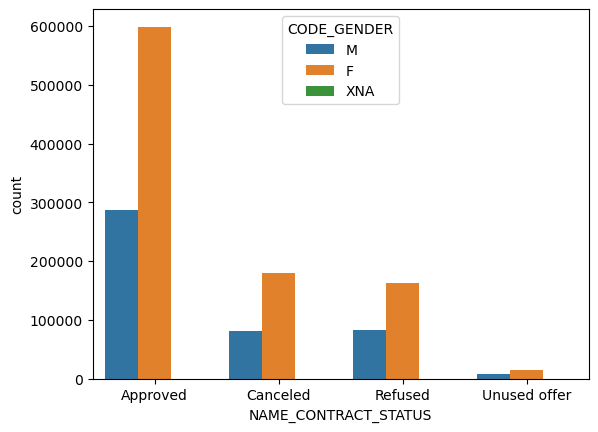

In [188]:
# NAME_CONTRACT STAUTS vs gender
sns.countplot(data = merged_df,x  ='NAME_CONTRACT_STATUS',hue='CODE_GENDER')

# obsevation
- females are more likely to get approved for loans as comapaired to males


# conclusion

1. bank should focus more on cash loans because of its low default arrount 8% dispite being the given the most time
2. males are more likely to default than females
3. bank should focus on unaccompanied because they have low default ratio
4. working income type are the safest among all
5. highly educated people are less like to default
6. people with married family satatus are the safest
7. bank should give the loan to the people who have their own house or appartment
8. labour occupation type has very low default rate
9. bank should focus on business entity type 3
10. people who are having income less than 1 million and taking loan in between 1.5 to 2.5 million are safest
11. peple who are taking loan between 1.5 to 2.5 million and having chindren less than 5 are among the safest segment
12. amount credit in between 2 to 3 million for amount goods price 1.5 to 3 million have less defaulters
13. people with already approved loans are safest and people with previously refused loans are more risky
14. unused offer have maximun number of defaults even for customers with high salary